In [1]:
# importing relevant packages

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from eofs.standard import Eof

In [2]:
# loading in the datasets 
msl_ds = xr.open_dataset("msl_monthly.nc")
sst_ds = xr.open_dataset("sst_monthly.nc")
v10_ds = xr.open_dataset("v10_monthly.nc")
u10_ds = xr.open_dataset("u10_monthly.nc")

# Extract the variable of interest (e.g., "data" is the variable name)
variables = [msl_ds['msl'], sst_ds['sst'], v10_ds['v10'], u10_ds['u10']]

In [ ]:
# Concatenate along the 'time' dimension
combined_data = xr.concat(variables, dim='time')

# Subset the spatial region (30°S–30°N, 100°E–70°W) and take bimonthly rolling average
subset_data = combined_data.sel(latitude=slice(30, -30), longitude=slice(100, 290)).rolling(time=2, center=True).mean().dropna(dim='time')

# ***** need to remove the coordinates that are over land 


# Stack spatial dimensions into a single 'space' dimension
stacked_data = subset_data.stack(space=('latitude', 'longitude')).transpose('time', 'space')

# Mask invalid values
data_masked = np.ma.masked_invalid(stacked_data.values)

In [ ]:
# will Eof run !?!
solver = Eof(data_masked)

In [ ]:
# extract the results from the solver
eof = solver.eofs(neofs=4)  # First EOF (spatial pattern)
pc1 = solver.pcs(npcs=1)    # Principal Component (time series)

In [30]:
# titles for the subplots
names = ["Mean Sea Level Pressure",
        "Sea Surface Temperature",
        "10m Meridional Wind Speeds",
        "10m Zonal Wind Speeds "]

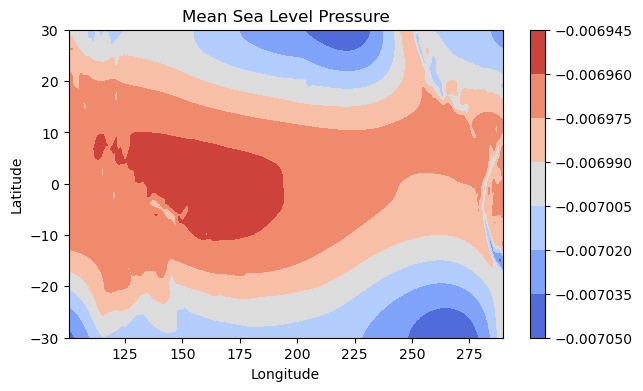

In [31]:
# Reshape EOF1 back to spatial dimensions for plotting
eof1_spatial = eof[0].reshape((len(subset_data['latitude']), len(subset_data['longitude'])))

plt.figure(figsize=(7, 4))
plt.contourf(subset_data['longitude'], subset_data['latitude'], eof1_spatial, cmap='coolwarm')
plt.colorbar(label='')
plt.title(names[0])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

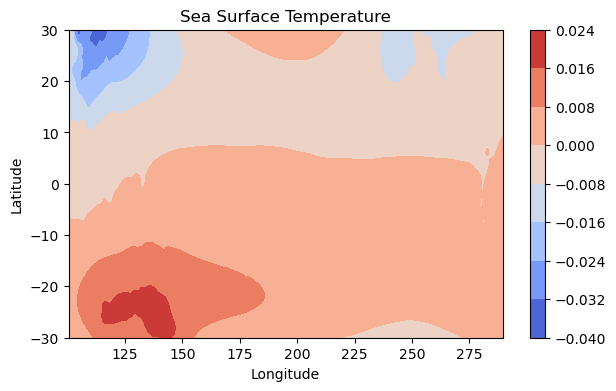

In [32]:
# Reshape EOF1 back to spatial dimensions for plotting
eof1_spatial = eof[1].reshape((len(subset_data['latitude']), len(subset_data['longitude'])))

plt.figure(figsize=(7, 4))
plt.contourf(subset_data['longitude'], subset_data['latitude'], eof1_spatial, cmap='coolwarm')
plt.colorbar(label='')
plt.title(names[1])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

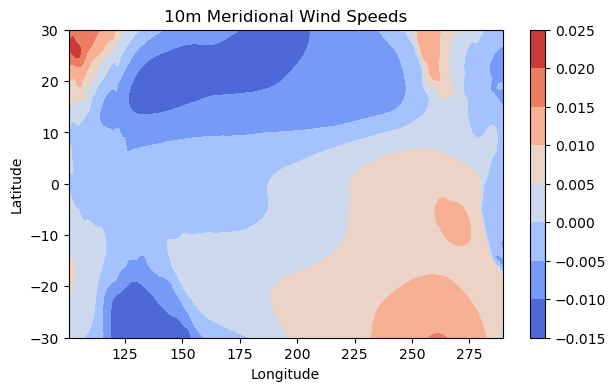

In [33]:
# Reshape EOF1 back to spatial dimensions for plotting
eof1_spatial = eof[2].reshape((len(subset_data['latitude']), len(subset_data['longitude'])))

plt.figure(figsize=(7, 4))
plt.contourf(subset_data['longitude'], subset_data['latitude'], eof1_spatial, cmap='coolwarm')
plt.colorbar(label='')
plt.title(names[2])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

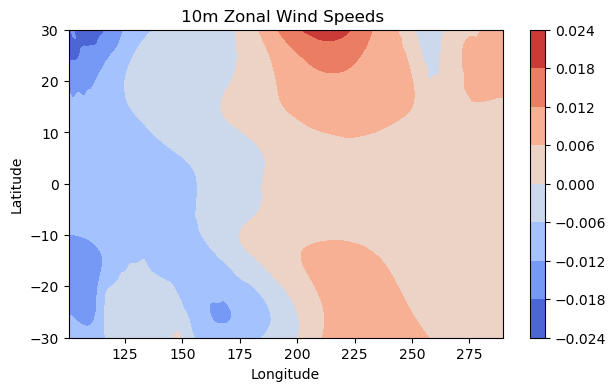

In [34]:
# Reshape EOF1 back to spatial dimensions for plotting
eof1_spatial = eof[3].reshape((len(subset_data['latitude']), len(subset_data['longitude'])))

plt.figure(figsize=(7, 4))
plt.contourf(subset_data['longitude'], subset_data['latitude'], eof1_spatial, cmap='coolwarm')
plt.colorbar(label='')
plt.title(names[3])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### below is an attempt at getting rid of the land coordinates but it didn't work

In [ ]:
# Load NetCDF files
file_paths = ["msl_monthly.nc",
             "sst_monthly.nc",
             "v10_monthly.nc",
             "u10_monthly.nc"]

ds1 = xr.open_dataset('msl_monthly.nc')
ds2 = xr.open_dataset('sst_monthly.nc')
ds3 = xr.open_dataset('v10_monthly.nc')
ds4 = xr.open_dataset('u10_monthly.nc')

# Ensure all datasets have the same grid (e.g., latitude, longitude)
# Regrid or interpolate if necessary

# Identify sea points: where all datasets have non-NaN values
# Use a mask for valid (non-NaN) data
# mask = ( ~np.isnan(ds2['sst']) )

mask = (~np.isnan(ds2['sst']))

# Apply the mask to each dataset, slice the data for the region 30°S–30°N, 100°E–70°W, get time averages
sea_ds1 = ds1.where(mask).sel(latitude=slice(30, -30), longitude=slice(100, 290)).rolling(time=2, center=True).mean()
# sea_ds2 = ds2.where(mask).sel(latitude=slice(30, -30), longitude=slice(100, 290)).rolling(time=2, center=True).mean()
sea_ds3 = ds3.where(mask).sel(latitude=slice(30, -30), longitude=slice(100, 290)).rolling(time=2, center=True).mean()
sea_ds4 = ds4.where(mask).sel(latitude=slice(30, -30), longitude=slice(100, 290)).rolling(time=2, center=True).mean()

# normalise each dataset
norm_ds1 = (sea_ds1 - sea_ds1.mean(dim='time'))/sea_ds1.std(dim='time')
# norm_ds2 = (sea_ds2 - sea_ds2.mean(dim='time'))/sea_ds2.std(dim='time')
norm_ds3 = (sea_ds3 - sea_ds3.mean(dim='time'))/sea_ds3.std(dim='time')
norm_ds4 = (sea_ds4 - sea_ds4.mean(dim='time'))/sea_ds4.std(dim='time')


# Step 6: Combine normalized datasets along a new 'variable' dimension
combined_data = xr.concat(
    [norm_ds1, norm_ds3, norm_ds4],
    dim='variable'
)

data_array = combined_data.to_array() 
# data_masked = np.ma.masked_invalid(data_array.values)

In [ ]:
# Step 7: Perform EOF analysis
solver = Eof(data_array)


# solver = Eof(stacked_data)

# Calculate spatial EOFs and the common PCA time series
eofs = solver.eofs(neofs=4)  # Spatial patterns for each variable (4 variables)
pcs = solver.pcs(npcs=1)     # One common time series (1 principal component)

# Calculate explained variance
variance_fraction = solver.varianceFraction(neigs=4)